The normal equation

In [1]:
# let's generate some data adding some random noise
import numpy as np

X = 2 * np.random.rand(100, 1) # [0, 2]
y = 4 + (3 * X) + np.random.rand(100, 1)


# Out function is
# y = 4 + 3*x + Gaussian noise


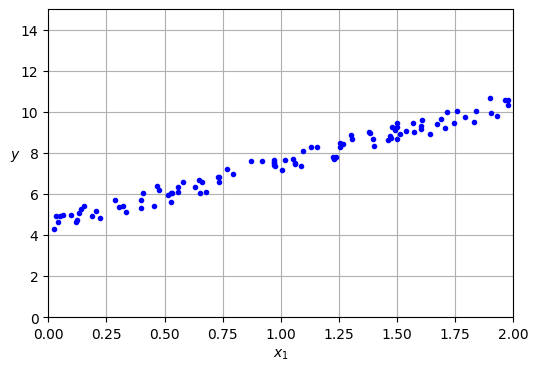

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [3]:
# let's calc the value that minimize the cost function using the normal equation
X_b = np.c_[np.ones((100, 1)), X] # this to add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# What we found:
theta_best

array([[4.56273282],
       [2.96017426]])

We were looking for y = 4 + 3*x + noise, we found something similar.
we can now do prdiction using theta

In [5]:
X_new = np.array([[0], [2]]) # create x
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b @ (theta_best) # do prediction, a dot multi with our found values
y_predict   # print them

array([[ 4.56273282],
       [10.48308135]])

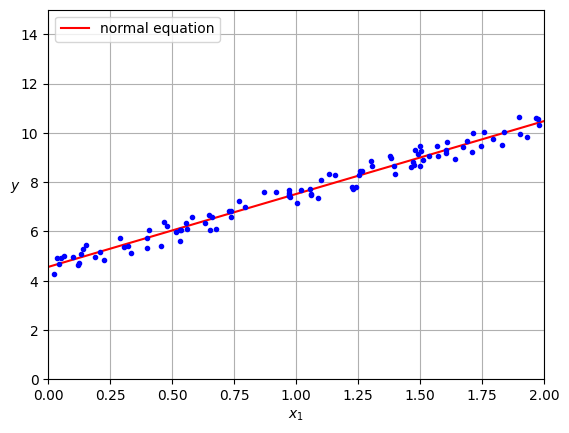

In [6]:
# and plot them against the original values
plt.plot(X_new, y_predict, "r-", label="normal equation") # found function in red line 
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Now we use Linear regression and check results

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # instance 
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # print what we found

(array([4.56273282]), array([[2.96017426]]))

In [8]:
# and the prediction ...
y_predict_lr = lin_reg.predict(X_new) # ok let's seeeee

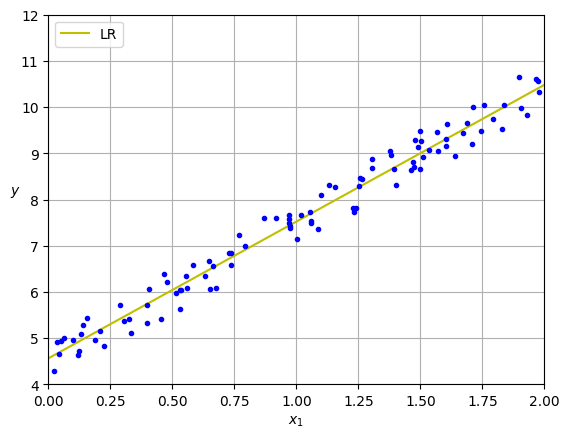

In [9]:
# and plot them against the original values
plt.plot(X_new, y_predict_lr, "y-", label="LR") # found function in yellow line 
#plt.plot(X_new, y_predict, "r-", label="normal equation") # they sovrappose!
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 4, 12])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [10]:
# call directly linear regression from his base class
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.56273282],
       [2.96017426]])

Gradient descent

Let's begin with batch gradient descent

In [11]:
etas = [0.02, 0.1, 0.5] # learning rate, different of them


n_epochs = 1000
m = 100
theta_found = []

for eta in etas:
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(n_epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    theta_found.append(theta)
    

In [12]:
# and see the result, whic more or less is 4 + 3
theta_found

[array([[4.5625688 ],
        [2.96031293]]),
 array([[4.56273282],
        [2.96017426]]),
 array([[-1.27242204e+74],
        [-1.50511430e+74]])]

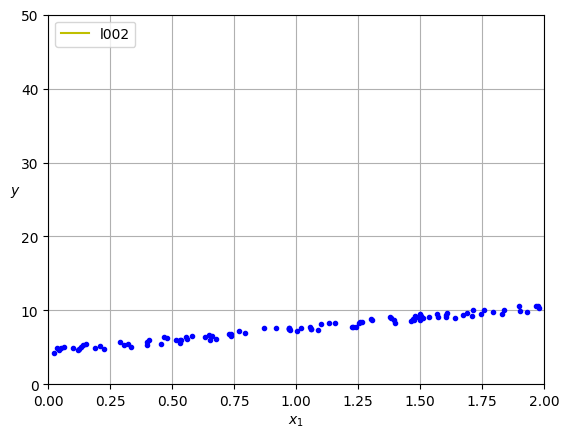

In [13]:

#y_gb_prediction = []
#for theta_test in theta_found:
#    X_new = np.array([[0], [2]]) # create x
#    X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
#    y_gb_prediction.append(X_new_b @ (theta_test)) # do prediction, a dot multi with our found values
#
y_gb_prediction = (X_new_b @ (theta_found[2]))

# plt.plot(X_new, y_gb_prediction[0], "y-", label="l002") # found function in yellow line
# plt.plot(X_new, y_gb_prediction[1], "c-", label="l01") # found function in yellow line
# plt.plot(X_new, y_gb_prediction[2], "g-", label="l05") # found function in yellow line

plt.plot(X_new, y_gb_prediction, "y-", label="l002") # found function in yellow line
# and plot them against the original values
plt.plot(X, y, "b.") # original values in dot blue
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 50])
plt.grid()
plt.legend(loc="upper left")
plt.show()

Stochastic Gradient Descent

In [14]:
n_epochs = 50 # note: before we iterated 1000 !
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # taking it randomly !
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[4.54853926],
       [2.95866193]])

In [16]:
# and if we want to use directly scikit learn ... use the SGDRegressor ! 

# param: max nr of iteration
# eta is the learning rate
# loss drop = 1e-3

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
# and what we found ... yeah quite similar !
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52647995]), array([2.95044775]))

Mini-batch Gradient Descent

Polynomial Regression

In [18]:
# generate some quadratic data plus noise
# y = 0.5*X^2 + X + 2 + noise
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

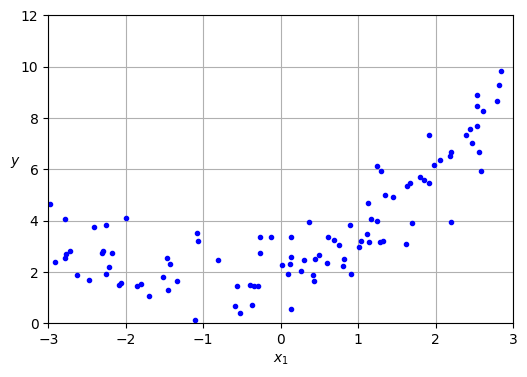

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 12])
plt.grid()
plt.show()

In [20]:
# use PolynomialFeatures class from scikit learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X[0]

array([0.13705999])

In [22]:
# X_poly now contains the original feature of X plus the square of this feature
X_poly[0]

array([0.13705999, 0.01878544])

In [23]:
# now we can use LinearReg
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02975967]), array([[0.96929987, 0.49852629]]))

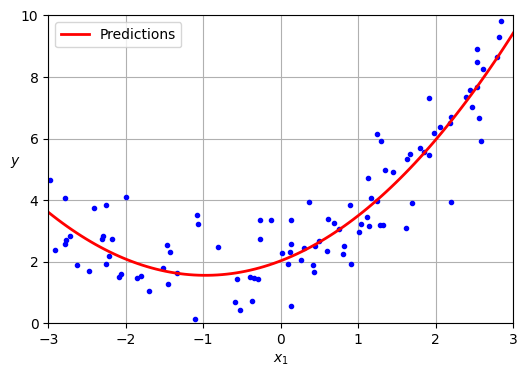

In [24]:
# the model estimate 0.48x^2 + 0.989x + 2, which is more or less what we had
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Learning Curves


Regularized Linear Models

Ridge regression

In [25]:
# a new dataset ....
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

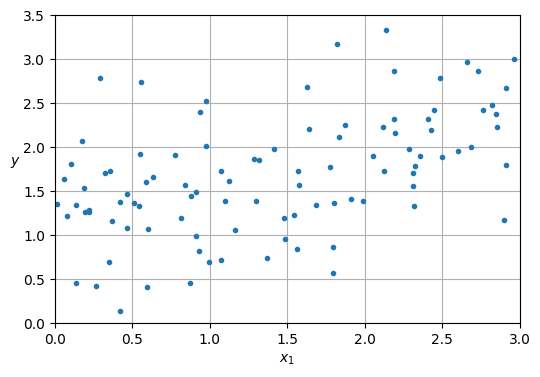

In [26]:
# super noisy
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [27]:
#
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky") # matrix factoriazioni
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]]) # let's see a prediction

array([[1.73969402]])

In [28]:
# using stochastic 
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42) # The penalty hyperparameter sets the type of regularization term to use 
sgd_reg.fit(X, y.ravel()) # ravel, beacause fir expect 1D targets
sgd_reg.predict([[1.5]])

array([1.74136712])

Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression 